In [4]:
# import SparkSession
from pyspark.sql import SparkSession

# start session and read dataframe from .csv
ss = SparkSession.builder.appName("NuclearPlantAnalysis").getOrCreate()
df = ss.read.csv(r"C:\\Users\\epicj\\OneDrive\\Documents\\BSc CompSci\\Big Data\\nuclear_plants_small_dataset.csv", encoding="utf-8", header=True, inferSchema=True)

# display dataframe to test
df.printSchema()
df.show()

root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3 : double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Pressure _sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure

In [28]:
from pyspark.sql.functions import col,isnan, when, count

# modified and extended code from https://sparkbyexamples.com/pyspark/pyspark-find-count-of-null-none-nan-values/
# display the number of NaN values per feature in large dataframe
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|     0|                   0|                   0|                    0|                   0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|
+------+--------

In [5]:
# create seperate dataframe to hold 'normal' datapoints
dfn = df.filter(df["Status"] == "Normal")

# show 'normal' dataframe description
dfnDesc = dfn.describe()
dfnDesc.show()

+-------+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+-------+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|   498|                 498|                 498|                  498|                 498|               498|               498|               498|               498|               498|               498|               498|    

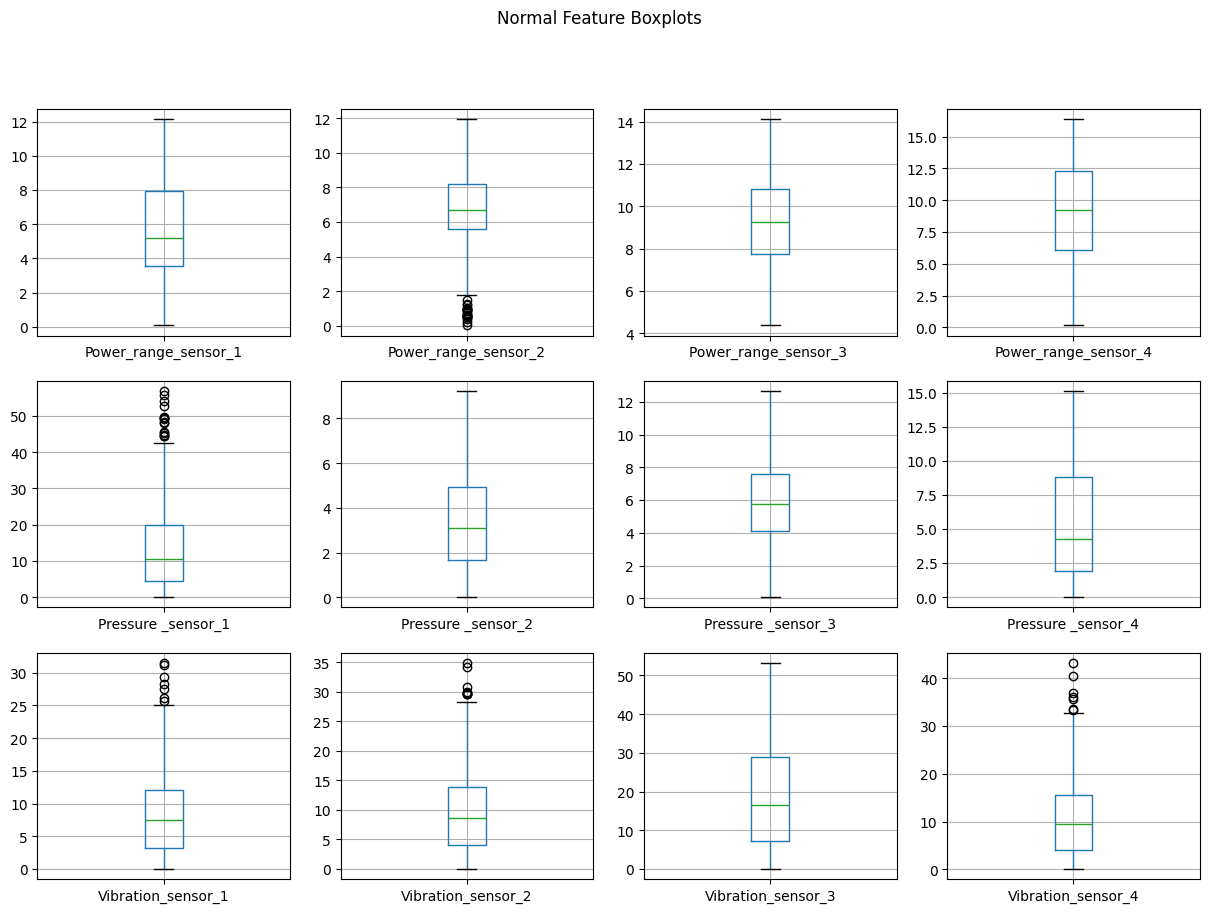

In [15]:
# import matplotlib.pyplot for plotting functionality
import matplotlib.pyplot as plt

# convert dataframe to pandas dataframe
dfnPandas = dfn.toPandas()

# drop status column
dfnPandas.drop("Status", axis=1, inplace=True)

# set layout of plots and give it a title
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Normal Feature Boxplots')

# iterate through features and generate boxplots
for i, col in enumerate(dfnPandas.columns):
    ax = axes[i // 4, i % 4]
    dfnPandas.boxplot(column=col, ax=ax)

    # formatting for clarity
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')

# show plots
plt.show()

In [16]:
# create seperate database to hold 'abnormal' datapoints
dfa = df.filter(df["Status"] == "Abnormal")

# show 'abnormal' database description
dfaDesc = dfa.describe()
dfaDesc.show()

+-------+--------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|  Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+-------+--------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|     498|                 498|                 498|                  498|                 498|               498|               498|               498|               498|               498|               498|               

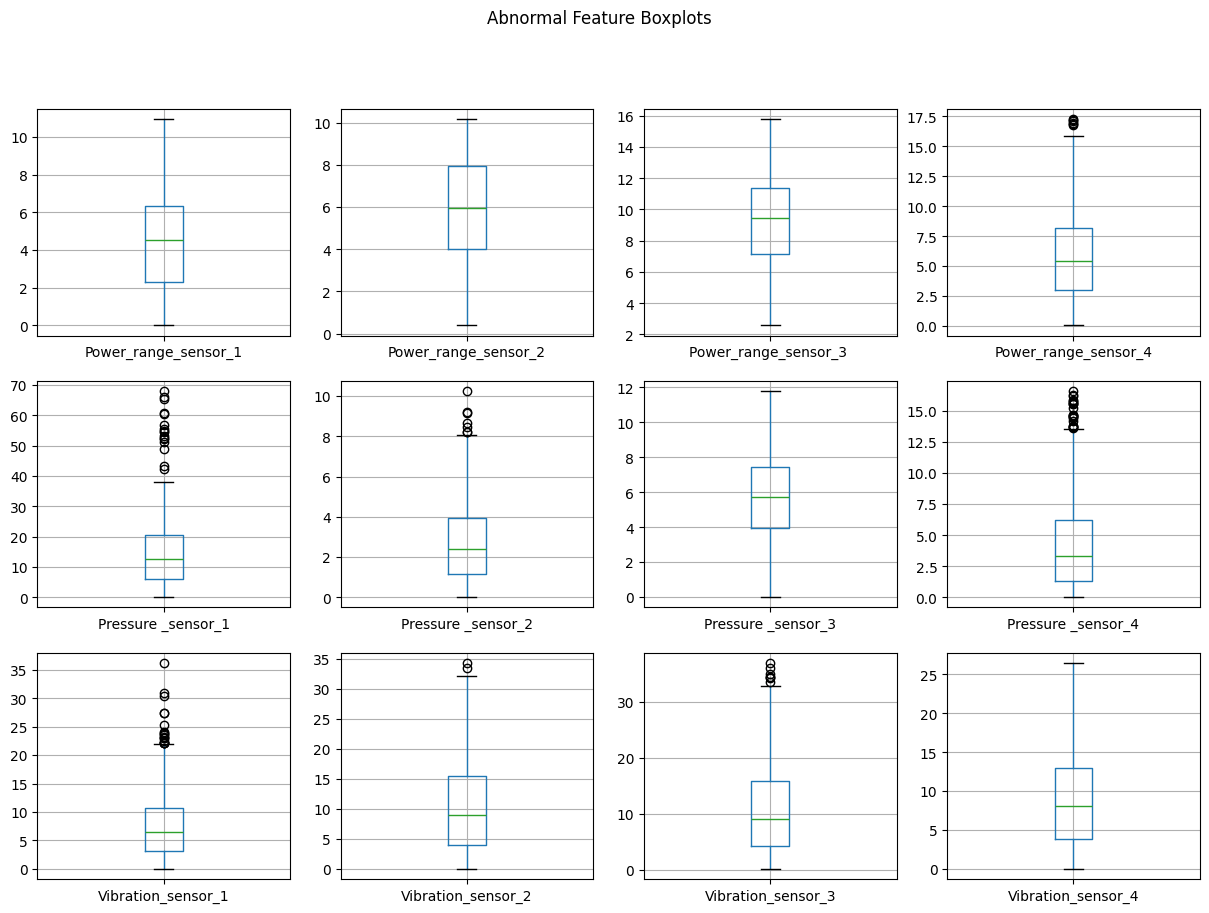

In [18]:
# convert dataframe to pandas dataframe
dfaPandas = dfa.toPandas()

# drop status column
dfaPandas.drop("Status", axis=1, inplace=True)

# set layout of plots and give it a title
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Abnormal Feature Boxplots')

# iterate through features and generate boxplots
for i, col in enumerate(dfaPandas.columns):
    ax = axes[i // 4, i % 4]
    dfaPandas.boxplot(column=col, ax=ax)

    # formatting for clarity
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')

# show plots
plt.show()

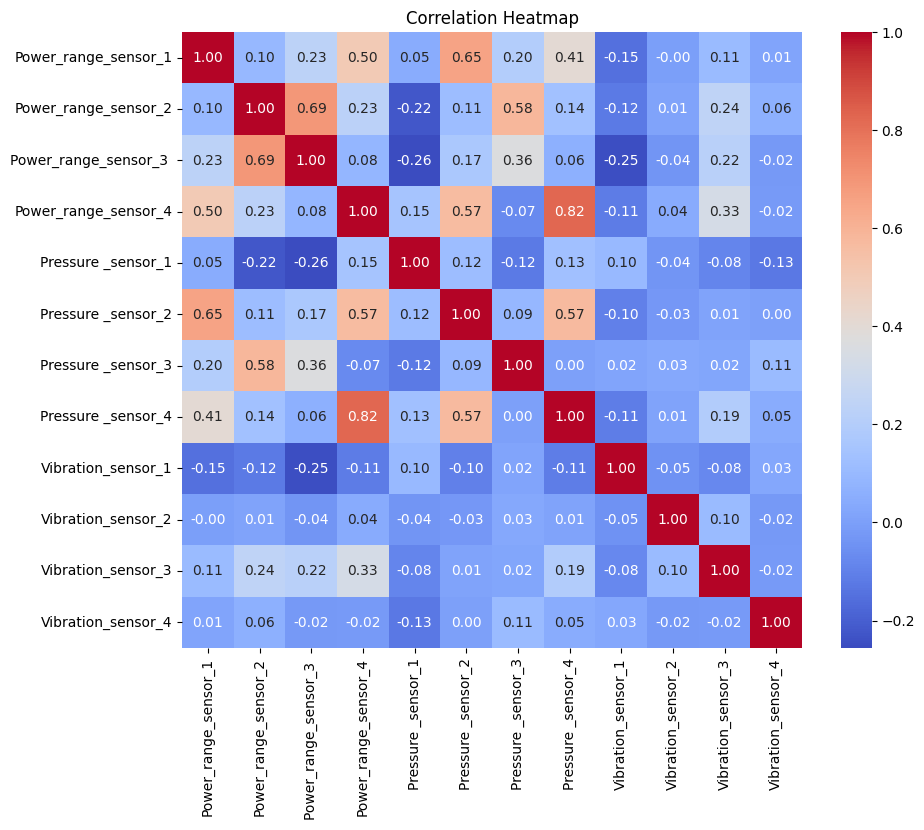

In [27]:
# seaborn for heatmap
import seaborn as sns

# convert large dataset to pandas dataset
dfPandas = df.toPandas()

# drop status column
dfPandas.drop('Status', axis=1, inplace=True)

# formatting for clarity
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")

# generate heatmap
sns.heatmap(dfPandas.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# show heatmap
plt.show()